In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ImportCSV") \
    .getOrCreate()

In [ ]:
headers = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
                     'original_language', 'budget_musd', 'revenue_musd', 'production_companies',
                     'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime',
                     'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size']

df = spark.read.csv("/content/Final_preprocessed_data.csv", header=False, inferSchema=True)

for old_name, new_name in zip(df.columns, headers):
    df = df.withColumnRenamed(old_name, new_name)

df.show()

+------+--------------------+--------------------+------------+--------------------+---------------------+-----------------+-----------+------------+--------------------+--------------------+----------+------------+----------+-------+--------------------+--------------------+--------------------+--------------------+---------+---------------+---------+
|    id|               title|             tagline|release_date|              genres|belongs_to_collection|original_language|budget_musd|revenue_musd|production_companies|production_countries|vote_count|vote_average|popularity|runtime|            overview|    spoken_languages|         poster_path|                cast|cast_size|       director|crew_size|
+------+--------------------+--------------------+------------+--------------------+---------------------+-----------------+-----------+------------+--------------------+--------------------+----------+------------+----------+-------+--------------------+--------------------+--------------

# Visualizing the Data

* Revenue vs. Budget Trends

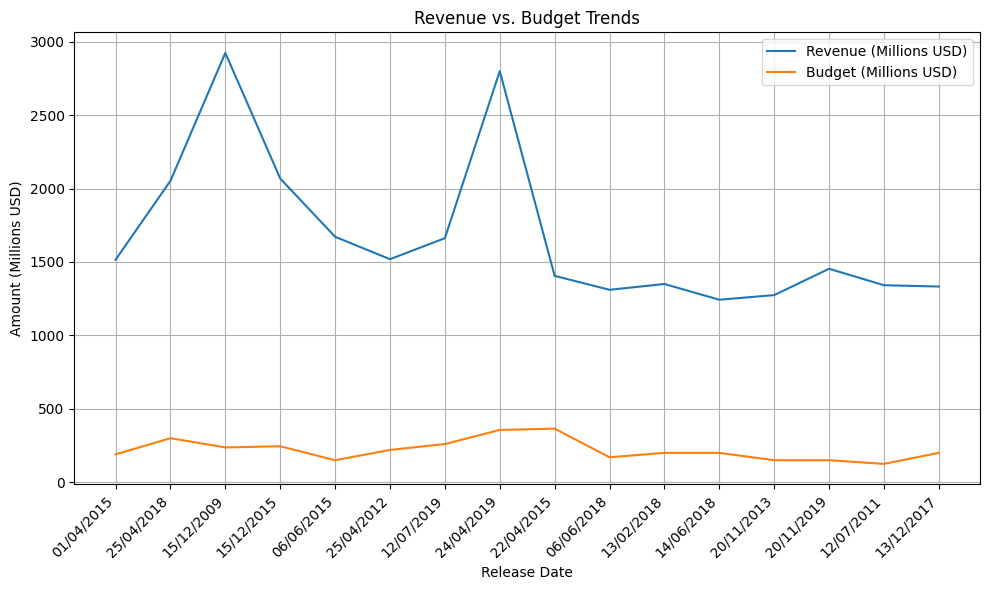

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

pandas_df = df.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(pandas_df['release_date'], pandas_df['revenue_musd'], label='Revenue (Millions USD)')
plt.plot(pandas_df['release_date'], pandas_df['budget_musd'], label='Budget (Millions USD)')
plt.xlabel('Release Date')
plt.ylabel('Amount (Millions USD)')
plt.title('Revenue vs. Budget Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

* ROI Distribution by Genre

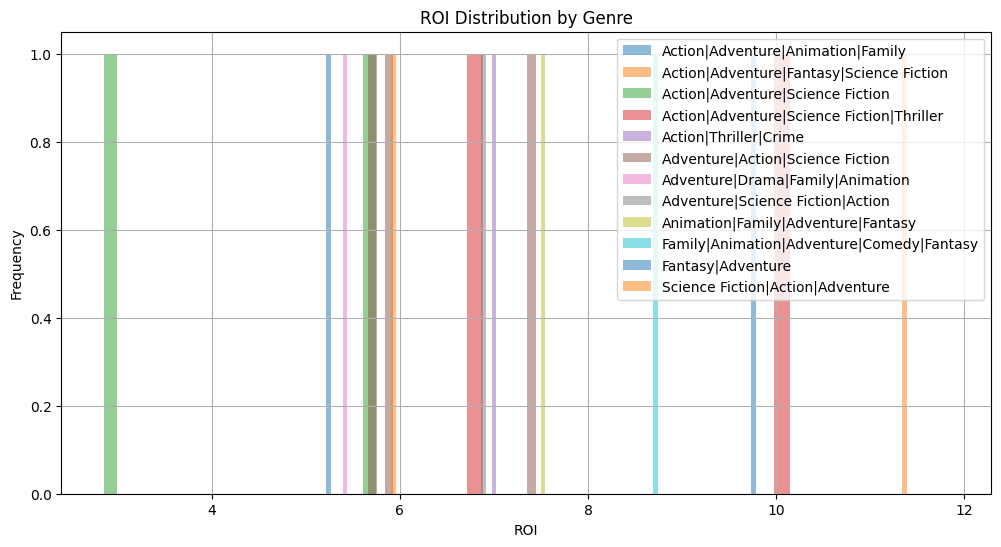

In [4]:
pandas_df['ROI'] = (pandas_df['revenue_musd'] - pandas_df['budget_musd']) / pandas_df['budget_musd']
genre_groups = pandas_df.groupby('genres')['ROI']

plt.figure(figsize=(12, 6))
for genre, roi_data in genre_groups:
    plt.hist(roi_data.dropna(), bins=20, alpha=0.5, label=genre)

plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.title('ROI Distribution by Genre')
plt.legend()
plt.grid(True)
plt.show()

* Popularity vs. Budget Trends

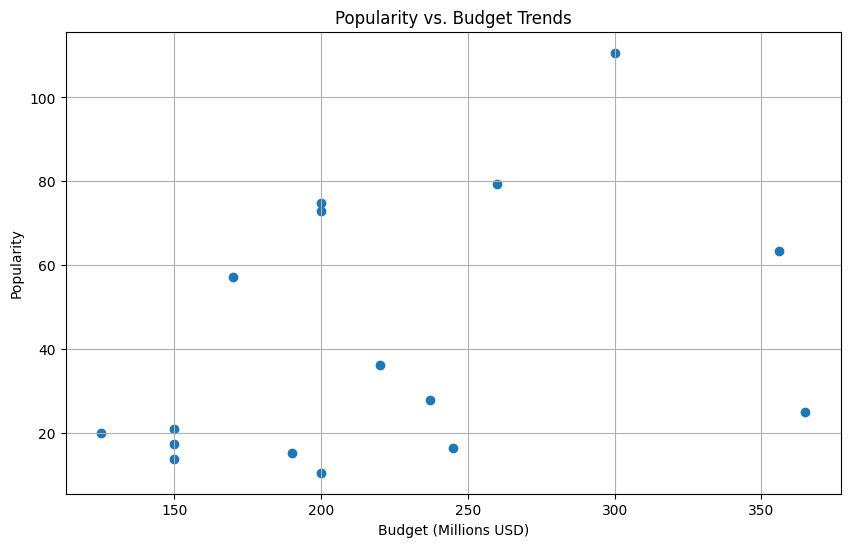

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['budget_musd'], pandas_df['popularity'])
plt.xlabel('Budget (Millions USD)')
plt.ylabel('Popularity')
plt.title('Popularity vs. Budget Trends')
plt.grid(True)
plt.show()

* Yearly Trends in Box Office Performance

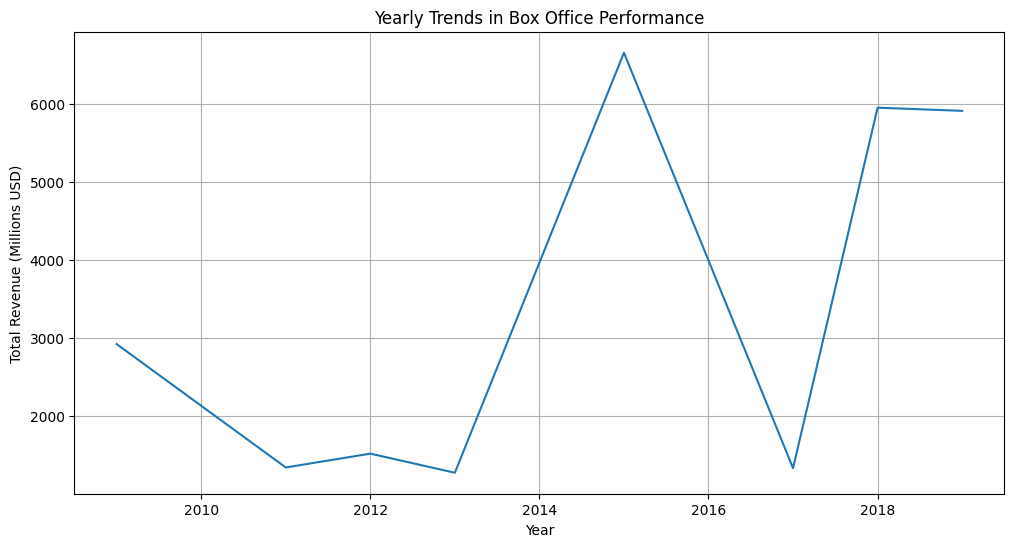

In [12]:
pandas_df['release_year'] = pd.to_datetime(pandas_df['release_date'], format='%d/%m/%Y').dt.year
yearly_revenue = pandas_df.groupby('release_year')['revenue_musd'].sum()

plt.figure(figsize=(12, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values)
plt.xlabel('Year')
plt.ylabel('Total Revenue (Millions USD)')
plt.title('Yearly Trends in Box Office Performance')
plt.grid(True)
plt.show()

* Comparison of Franchise vs. Standalone Success

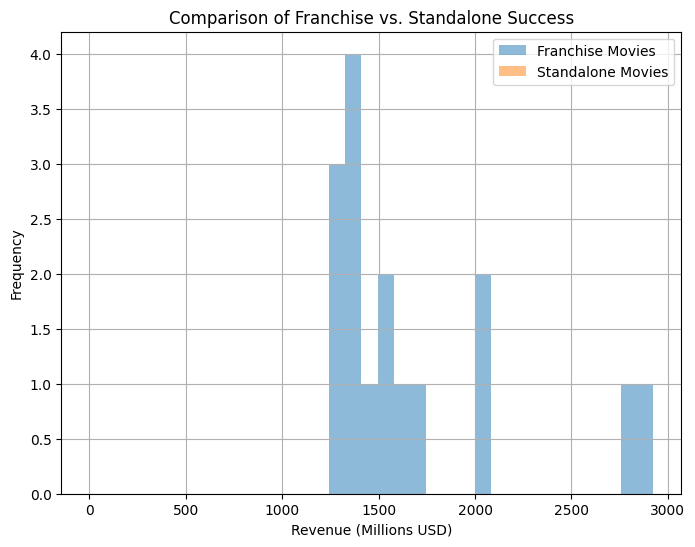

In [13]:
franchise_df = pandas_df[pandas_df['belongs_to_collection'].notna()]
standalone_df = pandas_df[pandas_df['belongs_to_collection'].isna()]

plt.figure(figsize=(8, 6))
plt.hist(franchise_df['revenue_musd'], bins=20, alpha=0.5, label='Franchise Movies')
plt.hist(standalone_df['revenue_musd'], bins=20, alpha=0.5, label='Standalone Movies')
plt.xlabel('Revenue (Millions USD)')
plt.ylabel('Frequency')
plt.title('Comparison of Franchise vs. Standalone Success')
plt.legend()
plt.grid(True)
plt.show()